In [1]:
import numpy as np
import scipy.signal
from matplotlib.pyplot import *
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display
from passe_bas_fonction import *
from spectrogram import *

import matplotlib.image as mpimg
import glob
from keras.models import Sequential,Model
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D, UpSampling2D, Input,Dropout,Conv2DTranspose,Concatenate
from keras.layers import  Conv1D, MaxPooling1D, UpSampling1D,Concatenate
from keras import optimizers

Using TensorFlow backend.


In [2]:
original_dataset_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\recordings\\"

base_dir = "C:\\Users\\joaro\\OneDrive\\Documents\\deep_learning_jupiter\\free_spoken_digit_dataset\\super_resolution_re_im"
train_dir = os.path.join(base_dir, 'train\\')

test_dir = os.path.join(base_dir, 'test\\')
train_dir_filtré=os.path.join(base_dir, 'train_dir_filtré\\')
test_dir_filtré=os.path.join(base_dir, 'test_dir_filtré\\')

In [1]:
os.mkdir(base_dir)
os.mkdir(train_dir)
os.mkdir(test_dir)
os.mkdir(train_dir_filtré)
os.mkdir(test_dir_filtré)

NameError: name 'os' is not defined

In [ ]:
speakername=['_jackson_{}.wav','_nicolas_{}.wav','_theo_{}.wav','_yweweler_{}.wav']
for i in range(10):    
    for s in speakername:
        fnames_test=[str(i)+s.format(j) for j in range(5)]
        fnames_train=[str(i)+s.format(j) for j in range(5,50)]
        
        for fname in fnames_test:
            src = os.path.join(original_dataset_dir, fname)
            dst = os.path.join(test_dir, fname)
            
            shutil.copyfile(src, dst)
            
        for fname in fnames_train:
             src = os.path.join(original_dataset_dir, fname)
             dst = os.path.join(train_dir, fname)
            
             shutil.copyfile(src, dst)
             
    i=i+1;


In [105]:
fce=0.0226 #sr=8000
ftype="butter"
ordre=2
b,a = creer_filter(fce,"highpass",ftype,ordre)
filter_path(train_dir,train_dir_filtré,b,a)
filter_path(test_dir,test_dir_filtré,b,a)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\


In [106]:
Xtest=dir_to_spectro_RI(test_dir)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\test\
60.502678
49.987488
58.188217
81.21237
47.47417
20.476244
24.171278
15.29165
16.715319
22.655363
2.2696552
2.48213
2.1973476
2.0212915
1.9480641
3.0398982
2.989939
2.493034
5.6055827
5.969765
31.064844
23.110518
19.947502
21.79289
28.248035
18.100708
9.219726
8.7463665
11.304138
9.832926
1.9926345
2.888516
1.9189382
1.9954377
1.6138772
2.4231536
2.7500799
5.07282
2.4514883
5.839655
23.84542
26.831783
24.907839
30.173288
30.018639
20.421326
30.215017
16.57657
25.486338
12.82558
1.9494501
1.6094034
2.1507647
3.0277135
1.3558251
2.7067523
3.2909966
2.138092
2.146415
3.2251525
37.36208
25.38367
25.026709
39.374523
36.16789
14.546206
11.893604
28.446453
11.978585
8.555171
1.5447109
2.600695
1.6466327
1.6570432
1.413543
1.3837674
3.4228578
3.8391159
3.28036
3.7436638
32.73041
41.777225
34.30666
41.10922
36.469982
35.62909
25.389397
35.649586
17.933117
17.451046
4.191909
1

In [107]:
print(Xtest[0])

[[[-2.62320886e-04 -1.08539265e-04]
  [ 1.45590311e-04  7.51841580e-05]
  [-5.18208653e-05  3.96235519e-05]
  ...
  [-8.77078273e-05 -2.23161442e-05]
  [-5.91404496e-05  1.76698362e-04]
  [ 4.53920540e-04 -4.21720470e-05]]

 [[-3.03451670e-04  1.53884117e-04]
  [-3.99085147e-05  1.20144519e-04]
  [-8.71815355e-05 -2.67863543e-05]
  ...
  [ 6.32739102e-05 -2.53324888e-05]
  [-1.97133835e-04  4.68261023e-05]
  [ 3.63757863e-04  2.54442766e-05]]

 [[-3.06632253e-04 -1.53463319e-04]
  [ 1.95282701e-05  9.18334263e-06]
  [-7.18616793e-05 -1.37716183e-04]
  ...
  [-2.26976263e-05  9.57909870e-05]
  [-3.32543095e-05 -2.73779500e-04]
  [ 3.73692426e-04  1.29660635e-04]]

 ...

 [[-1.87097584e-18  1.15018433e-04]
  [ 9.95100982e-06 -9.29976341e-06]
  [-4.49508070e-06  9.13611245e-07]
  ...
  [-3.98053430e-07  7.17050568e-07]
  [ 4.61495858e-07 -3.08054018e-06]
  [-3.32165337e-06  9.36767208e-07]]

 [[ 3.49620624e-18 -1.24750804e-04]
  [-2.77984441e-06  4.95554832e-06]
  [ 1.72170576e-06 -4.6766

In [108]:
print(Xtest.shape)

(200, 1025, 12, 2)


In [109]:
Xtrain=dir_to_spectro_RI(train_dir)
Xtrain_fil=dir_to_spectro_RI(train_dir_filtré)
Xtest_fil=dir_to_spectro_RI(test_dir_filtré)

processing C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\
75.577324
37.720306
43.99654
46.05644
61.41861
46.17696
53.027832
113.90581
31.688473
72.4485
78.12958
70.3794
32.466316
62.761208
80.07745
75.36227
51.720577
36.08988
50.063435
42.3172
32.21788
39.87049
31.27662
28.996902
30.200598
31.913534
30.090729
31.781303
35.957764
37.663017
79.070305
75.02463
42.261967
49.418674
62.833897
59.035885
62.13389
51.820637
50.091114
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train\0_jackson_49.wav
63.964336
69.595085
47.97268
58.0621
73.584755
56.194805
22.504168
22.0073
14.992234
27.279974
29.532463
18.0778
18.539259
24.977364
21.909916
24.514616
22.081976
16.870579
22.7064
19.360855
14.580669
23.289076
28.144249
22.907846
23.80118
20.700575
21.821707
16.969244
18.163605
11.07894
16.995846
20.384333
14.698432
20.020329
15.294678
23.099646
9.497845
13.282341
18.293974


13.491972
38.055523
23.742874
12.859924
34.610367
1.5178326
2.3059328
3.2785485
3.2930362
2.0931194
2.0404763
1.903551
2.5901341
0.9490184
1.391536
0.69361395
18.991606
24.461128
37.37393
47.402164
34.808937
1.9179722
47.972473
24.774271
5.5159016
2.2736404
2.025729
1.4172254
1.1210608
1.8723177
1.9353349
1.0676603
1.0572743
1.5074267
1.3943449
1.5515162
1.2774687
1.9948602
1.6029291
2.6835299
1.3415496
1.7719929
1.4237742
1.0388002
3.801707
1.6638317
1.5914736
5.118955
1.2620317
1.4828577
3.047757
6.2274957
3.887645
3.886996
3.0667844
2.8896415
6.4490204
5.7359695
7.425238
7.496102
2.8390925
6.9234395
5.9612827
2.722725
8.083741
6.642436
3.9921007
3.8699925
5.0638423
4.0981426
4.1308074
7.4853396
3.9839647
5.7342477
4.4433603
1.9844629
2.9552872
1.6949966
2.5895252
3.0015924
4.6066446
4.3269053
5.2626686
4.035904
2.7545657
2.658021
5.8408775
3.7182474
7.3226132
4.770145
8.187311
5.6322913
5.427064
6.5527687
5.7358613
25.830513
16.874567
36.32641
37.655075
27.891422
18.459566
21.593664

3.024331
3.738215
6.7944274
1.1214151
0.99622357
1.3461765
2.1658685
1.0213054
1.1647046
2.928299
1.0623475
0.7595296
2.3176415
1.101067
2.5382109
1.3967432
1.2416315
0.7892606
8.682957
2.0999532
2.3938024
3.0054345
3.8480911
5.438182
3.8751693
3.2066092
2.6253467
4.136118
4.3718586
4.416979
4.004375
6.8478837
3.0790536
5.756662
2.1207309
7.520086
11.108023
8.475404
7.043922
5.640233
4.4952855
4.1797514
2.2150412
2.263484
4.3308344
5.0097756
2.7583966
3.2541637
3.6227548
2.7676091
3.2086134
4.2810874
2.4907043
2.2535706
2.286196
3.833135
4.487451
3.277395
8.2388935
6.215094
3.0533237
4.0899816
3.6553688
25.854986
21.352945
29.901003
21.03337
22.68414
44.30766
38.19902
30.786816
27.47592
28.701958
27.472286
24.693657
35.43635
22.525919
20.698236
28.367397
29.600294
31.462854
28.766518
41.69927
31.471087
44.180756
44.563908
57.53107
42.20612
55.40501
67.39062
36.549362
82.33735
48.607517
55.055393
42.96852
54.236485
38.52147
41.953796
55.06845
56.683483
93.617355
48.43142
46.29921
36.312

1.7814668
1.9848083
2.0440514
1.4690764
2.030877
2.0738995
2.429319
1.8433808
2.8952298
1.9108472
1.7690232
3.1194386
4.025675
2.4835029
4.1557274
2.656046
18.08013
20.2357
11.080696
11.453778
13.252415
17.045134
11.633128
9.143808
11.5678005
12.98349
6.9883337
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\2_jackson_21.wav
14.706568
11.590848
12.485615
26.563646
14.501481
15.797466
22.290846
14.086878
21.787569
18.908949
17.268738
19.1887
9.165393
13.035057
12.839514
6.972189
7.086417
11.898599
9.002061
21.626137
25.358082
25.754454
8.948844
14.411581
17.968906
15.619565
17.491058
15.815304
20.609581
14.336927
11.978416
19.773872
4.655168
17.244677
17.464334
6.1338067
7.0921707
9.34373
6.5057206
5.836388
4.557953
8.409381
7.4802136
4.302823
6.977028
5.625022
4.7242327
5.8730683
3.9725718
4.0587115
3.902233
11.390833
4.9926662
8.807328
6.032348
4.3988934
6.258935
6.514216
2.929165
6.83893
7.349918
6.428177
4.208

C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\6_jackson_17.wav
24.336878
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\6_jackson_18.wav
25.78547
33.540356
31.778913
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\6_jackson_21.wav
19.805508
38.137615
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\6_jackson_23.wav
51.4918
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\6_jackson_24.wav
32.115616
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\6_jackson_25.wav
38.253338
22.652437
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_d

18.245628
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\9_theo_27.wav
20.145565
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\9_theo_29.wav
15.276713
C:\Users\joaro\OneDrive\Documents\deep_learning_jupiter\free_spoken_digit_dataset\super_resolution_re_im\train_dir_filtré\9_theo_30.wav
3.2240813
1.5362635
1.1314248
1.1293879
0.58701104
0.7197591
0.8610687
1.2204307
0.91037804
4.304057
2.1509447
0.5851069
2.4981627
1.8696322
0.6800063
0.5502965
0.46016088
1.8820924
0.4820396
0.97050637
1.3353785
1.0632011
1.0282582
0.68288404
0.8602626
1.5714316
2.5122197
1.8395683
2.5174153
3.0657246
1.6104078
1.3145347
1.124059
1.5988593
3.495803
1.4441271
2.377972
2.02926
1.7617755
1.881697
2.085114
1.5862797
2.5582862
1.1680187
1.5182065
1.3951441
0.82179177
0.9620626
0.7136372
0.9242875
0.9451311
0.6172823
1.789698
1.9160943
3.2080016
1.9600434
1.615

In [110]:
print(Xtest_fil[0][1])

[[ 9.3876966e-05 -5.0024431e-05]
 [ 9.0400130e-07  4.2681290e-06]
 [-2.6604212e-06  1.1960494e-06]
 [-1.4365078e-07 -4.5441826e-07]
 [-6.0992221e-07 -7.4882671e-05]
 [ 1.1742885e-04 -4.6255849e-05]
 [-8.9208654e-05  2.7678821e-06]
 [-3.2270846e-06 -3.9621477e-07]
 [ 5.0722697e-06  2.5660825e-06]
 [ 2.2988829e-06 -2.2043471e-06]
 [ 1.0144915e-06 -3.3397449e-05]
 [-1.2066483e-04  1.6421387e-05]]


In [139]:
#modele de https://arxiv.org/pdf/1703.08019.pdf
#pas séquentiel

input_img = Input(shape=(1025, 12,2))  # adapt this if using `channels_first` image data format
#comme une image rgb sauf que couleurs sont ici partie reelle et imag
conv1= Conv2D(12, (3, 3), activation='relu', padding='same')(input_img)

max1= MaxPooling2D((5, 2), padding='same')(conv1)
conv2 = Conv2D(20, (3, 3), activation='relu', padding='same')(max1)
max2= MaxPooling2D((5, 2), padding='same')(conv2)
conv3 = Conv2D(20, (3, 3), activation='relu', padding='same')(max2)
encoded = MaxPooling2D((1, 3), padding='same')(conv3)

x = Conv2D(30, (3, 3), activation='relu', padding='same')(encoded)
x = Conv2D(40, (3, 3), activation='relu', padding='same')(x)

x = Conv2D(30, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((1,3))(x)
#merge=Concatenate(axis=-1)([x,conv3])
x = Conv2D(30, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((5, 2))(x)
merge1=Concatenate(axis=-1)([x,conv2])
x = Conv2D(20, (3, 3), activation='relu', padding='same')(x)

x = UpSampling2D((5, 2))(x)
#merge2=Concatenate(axis=-1)([x,conv1])


decoded = Conv2D(2, (3, 3), activation='sigmoid', padding='same')(x)
autoencoder = Model(input_img, decoded)
autoencoder.compile(loss='mse',
              optimizer=optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
              )
#optimizer=optimizers.SGD(lr=0.0001, momentum=0.9, decay=0.0, nesterov=False)
autoencoder.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, 1025, 12, 2)       0         
_________________________________________________________________
conv2d_127 (Conv2D)          (None, 1025, 12, 12)      228       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 205, 6, 12)        0         
_________________________________________________________________
conv2d_128 (Conv2D)          (None, 205, 6, 20)        2180      
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 41, 3, 20)         0         
_________________________________________________________________
conv2d_129 (Conv2D)          (None, 41, 3, 20)         3620      
_________________________________________________________________
max_pooling2d_45 (MaxPooling (None, 41, 1, 20)         0         
__________

In [140]:
autoencoder.fit(Xtrain_fil,Xtrain,epochs=30,
                batch_size=20,
                shuffle=True,
                validation_data=(Xtest_fil, Xtest))

Train on 1796 samples, validate on 200 samples
Epoch 1/30
1796/1796 [==============================] - 7s 4ms/step - loss: 0.2494 - val_loss: 0.2460
Epoch 2/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.2420 - val_loss: 0.2383
Epoch 3/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.2342 - val_loss: 0.2305
Epoch 4/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.2264 - val_loss: 0.2227
Epoch 5/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.2186 - val_loss: 0.2148
Epoch 6/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.2108 - val_loss: 0.2069
Epoch 7/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.2027 - val_loss: 0.1988
Epoch 8/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.1945 - val_loss: 0.1905
Epoch 9/30
1796/1796 [==============================] - 4s 2ms/step - loss: 0.1861 - val_loss: 0.1819
Epoch 10/30
1796/1796 [============

In [141]:
decoded = autoencoder.predict(Xtest_fil)
print(decoded.shape)

(200, 1025, 12, 2)


In [142]:
i=complex(0,1)
p=1 #indice to display
size_freq=1025
size_time=12
Xtest1=[]
Xtest_fil1=[]
decoded1=[]
for i in range(len(Xtest)):
    Xtest1.append(np.reshape(Xtest[i],(2,size_freq,size_time)))
    Xtest_fil1.append(np.reshape(Xtest_fil[i],(2,size_freq,size_time)))
    decoded1.append(np.reshape(decoded[i],(2,size_freq,size_time)))
Xtest_tab=np.asarray(Xtest1) 
Xtest_fil_tab=np.asarray(Xtest_fil1) 
decoded_tab=np.asarray(decoded1) 
Spec_test=np.reshape(Xtest_tab[p][0]+Xtest_tab[p][1]*i,(size_freq,size_time))
Spec_test_fil=np.reshape(Xtest_fil_tab[p][0]+Xtest_fil_tab[p][1]*i,(size_freq,size_time))
Spec_test_decoded=np.reshape(decoded_tab[p][0]+decoded_tab[p][1]*i,(size_freq,size_time))
print(Spec_test_decoded.shape)


(1025, 12)


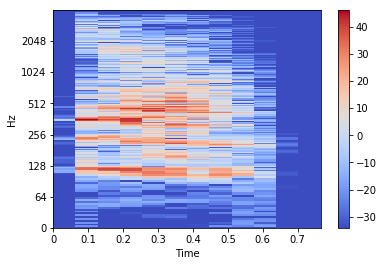

In [143]:
Spec_testdb= librosa.amplitude_to_db(abs(Spec_test))
librosa.display.specshow(Spec_testdb, sr=8000, x_axis='time', y_axis='log')
colorbar()

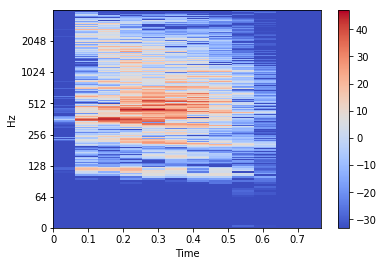

In [144]:
Spec_testdb2= librosa.amplitude_to_db(abs(Spec_test_fil))
librosa.display.specshow(Spec_testdb2, sr=8000, x_axis='time', y_axis='log')
colorbar()

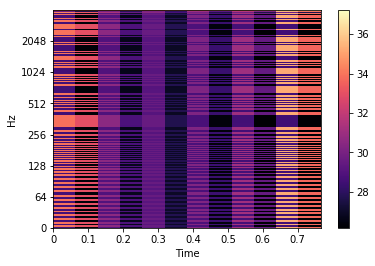

In [145]:
Spec_testdb3= librosa.amplitude_to_db(abs(Spec_test_decoded))
librosa.display.specshow(Spec_testdb3, sr=8000, x_axis='time', y_axis='log')
colorbar()